In [89]:
#Packages import
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [90]:
import os
cwd = os.getcwd()

In [91]:
print(cwd)

C:\Users\temio


In [92]:
df = pd.read_csv(r'C:\Users\temio\Desktop\Python Project\movies.csv')

In [93]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169
4,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120


In [94]:
# checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [95]:
#checking for datatypes
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [96]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [97]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169
4,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120


In [98]:
#creating correct year- seperating date from  country

s = df['released'].str.split(pat = '(', n = 1, expand = True)

In [99]:
s.head()

,0,1
0,"April 26, 2019",United States)
1,"April 27, 2018",United States)
2,"December 15, 2017",United States)
3,"May 25, 2007",United States)
4,"November 17, 2017",United States)


In [100]:
# seperating year from date
p = s[0].str.split(pat = ',', n = 1, expand = True)

In [101]:
p.head()

,0,1
0,April 26,2019
1,April 27,2018
2,December 15,2017
3,May 25,2007
4,November 17,2017


In [102]:
df['correct year'] = p[1]

In [103]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,2017
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,2007
4,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,2017


In [104]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [105]:
pd.set_option('display.max_rows', 20)

In [106]:
# checking for  and dropping duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
22,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
39,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
20,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,Claire of the Moon,Unrated,Drama,1992,"October 21, 1993 (Australia)",5.1,950,Nicole Conn,Nicole Conn,Trisha Todd,United States,130000,0,Demi-Monde Productions,107,1993
5443,"Silent Night, Deadly Night Part 2",R,Horror,1987,"April 10, 1987 (United States)",3.8,6400,Lee Harry,Michael Hickey,Eric Freeman,United States,100000,0,Silent Night Releasing Corporation,88,1987
5357,Time Walker,PG,Horror,1982,"November 19, 1982 (United States)",3.6,1700,Tom Kennedy,Jason Williams,Ben Murphy,United States,750000,0,Byzantine Productions,83,1982
5452,Creepozoids,R,Horror,1987,"October 2, 1987 (United States)",4.0,2100,David DeCoteau,Dave Eisenstark,Linnea Quigley,United States,75000,0,Titan Productions,72,1987


In [107]:
pd.set_option('display.max_rows', None)

In [108]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

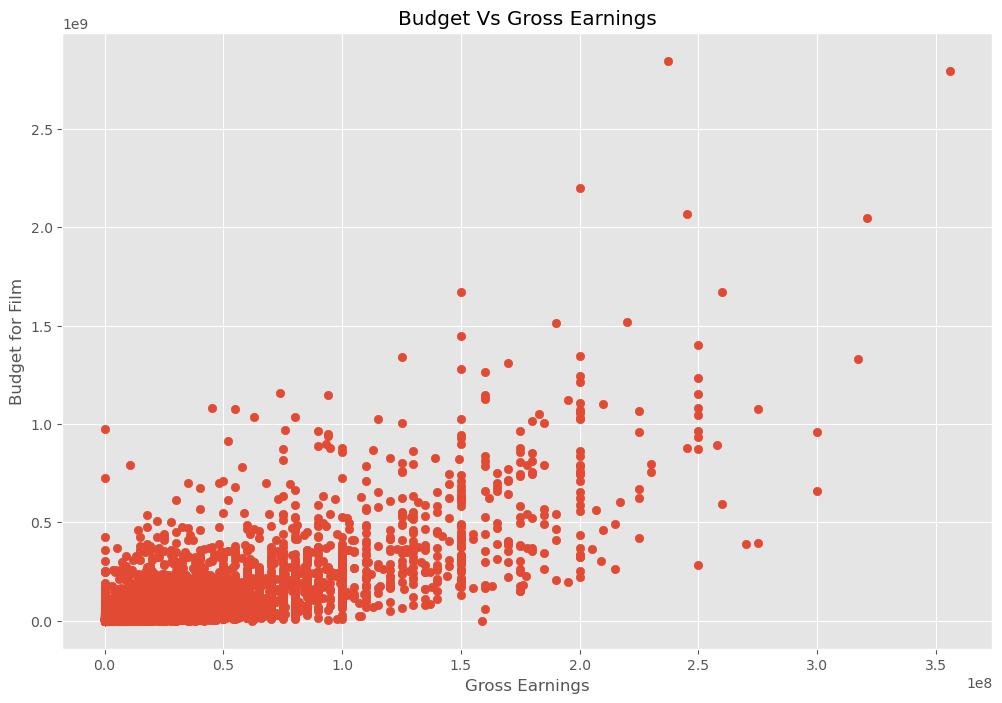

In [109]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

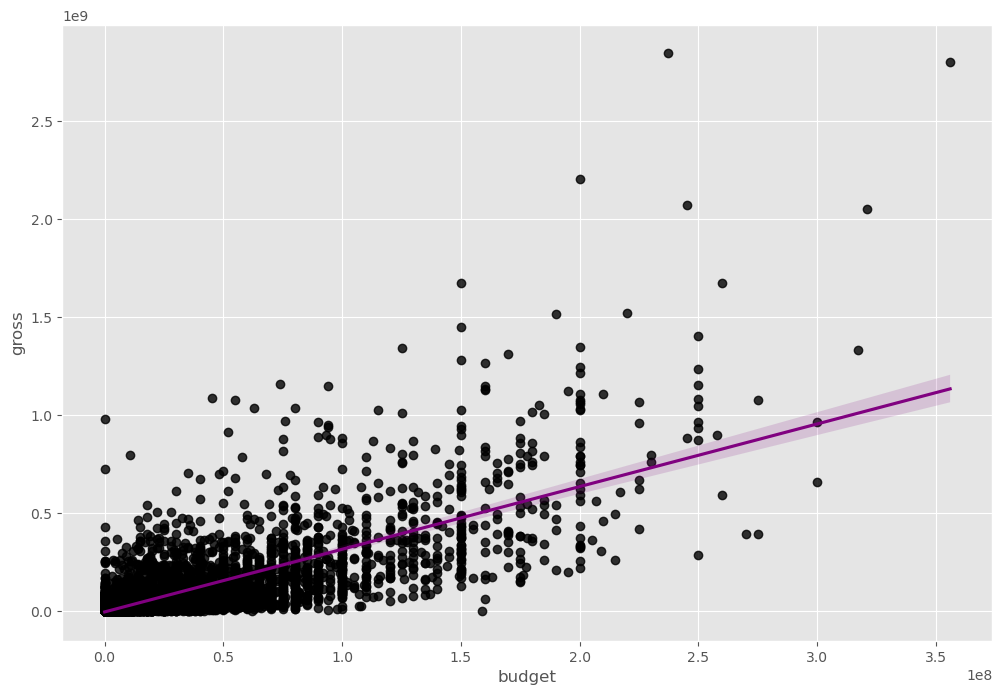

In [110]:
# Scatter plot with budget vs gross to check for correlation using seaborn
sns.regplot(x='budget', y='gross', data =df, scatter_kws={"color": "black"}, line_kws={"color":"purple"} )

In [111]:
# correlation (pearson, kendall, spearman)
df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.098734,0.221074,0.308251,0.260277,0.115729
score,0.098734,1.000000,0.414590,0.055416,0.188842,0.399761
votes,0.221074,0.414590,1.000000,0.482783,0.631703,0.310044
budget,0.308251,0.055416,0.482783,1.000000,0.749625,0.270055
gross,0.260277,0.188842,0.631703,0.749625,1.000000,0.245266
runtime,0.115729,0.399761,0.310044,0.270055,0.245266,1.000000


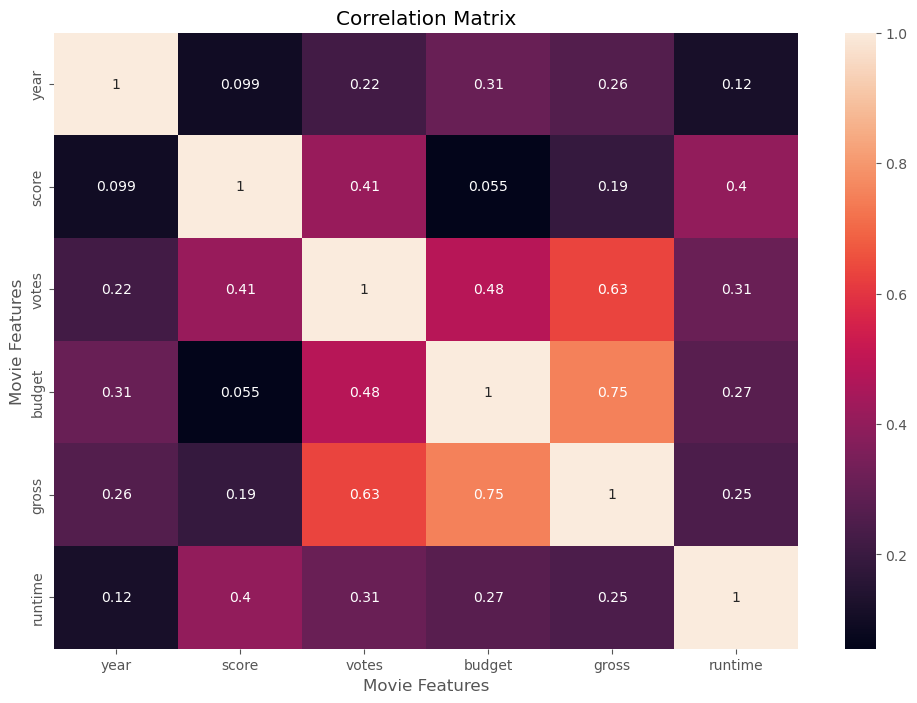

In [112]:
# correlation between budget and gross is the highest
correlation_matrix = df.corr(method='pearson') 
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [113]:
#change all strings columns to numeric
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
22,520,5,0,2009,682,7.8,1100000,1114,1721,2222,55,237000000,2847246203,2150,162,29
0,522,5,0,2019,176,8.4,903000,160,714,2131,55,356000000,2797501328,1528,181,39
39,6717,5,6,1997,690,7.8,1100000,1114,1721,1517,55,200000000,2201647264,2150,194,17
20,4997,5,0,2015,684,7.8,876000,1084,2472,499,55,245000000,2069521700,1466,138,35
1,523,5,0,2018,185,8.4,897000,160,714,2131,55,321000000,2048359754,1528,149,38


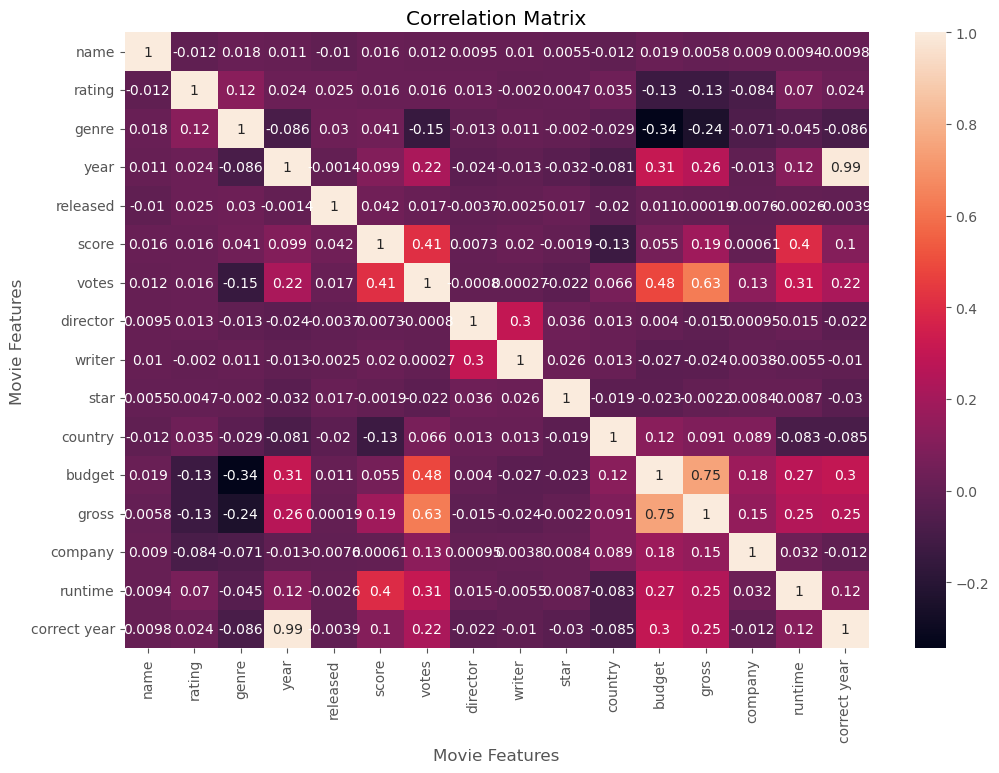

In [114]:
correlation_matrix = df_numerized.corr(method='pearson') 
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [115]:
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
name,1.000000,-0.011914,0.017707,0.010861,-0.010373,0.016010,0.012050,0.009509,0.010071,0.005464,-0.011686,0.019493,0.005798,0.008975,0.009396,0.009768
rating,-0.011914,1.000000,0.118543,0.024330,0.024726,0.016007,0.015784,0.013068,-0.001991,0.004726,0.034888,-0.130005,-0.131650,-0.084068,0.069633,0.023803
genre,0.017707,0.118543,1.000000,-0.086482,0.030124,0.040820,-0.148420,-0.012784,0.010849,-0.001962,-0.029041,-0.344419,-0.242161,-0.071178,-0.044592,-0.085759
year,0.010861,0.024330,-0.086482,1.000000,-0.001382,0.098734,0.221074,-0.023743,-0.012643,-0.031591,-0.080619,0.308251,0.260277,-0.012567,0.115729,0.993395
released,-0.010373,0.024726,0.030124,-0.001382,1.000000,0.042336,0.017279,-0.003701,-0.002535,0.017186,-0.020014,0.010549,0.000192,-0.007614,-0.002593,-0.003926
score,0.016010,0.016007,0.040820,0.098734,0.042336,1.000000,0.414590,0.007348,0.019739,-0.001870,-0.129741,0.055416,0.188842,0.000612,0.399761,0.104983
votes,0.012050,0.015784,-0.148420,0.221074,0.017279,0.414590,1.000000,-0.000802,0.000266,-0.022213,0.066190,0.482783,0.631703,0.128807,0.310044,0.218308
director,0.009509,0.013068,-0.012784,-0.023743,-0.003701,0.007348,-0.000802,1.000000,0.296649,0.036444,0.012974,0.003976,-0.015330,0.000946,0.015486,-0.021762
writer,0.010071,-0.001991,0.010849,-0.012643,-0.002535,0.019739,0.000266,0.296649,1.000000,0.026169,0.013331,-0.027306,-0.023984,0.003797,-0.005465,-0.010487
star,0.005464,0.004726,-0.001962,-0.031591,0.017186,-0.001870,-0.022213,0.036444,0.026169,1.000000,-0.019477,-0.023263,-0.002200,0.008394,0.008701,-0.029937


In [116]:
pd.set_option('display.max_rows', None)

In [117]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.011914
              genre           0.017707
              year            0.010861
              released       -0.010373
              score           0.016010
              votes           0.012050
              director        0.009509
              writer          0.010071
              star            0.005464
              country        -0.011686
              budget          0.019493
              gross           0.005798
              company         0.008975
              runtime         0.009396
              correct year    0.009768
rating        name           -0.011914
              rating          1.000000
              genre           0.118543
              year            0.024330
              released        0.024726
              score           0.016007
              votes           0.015784
              director        0.013068
              writer         -0.001991
              star       

In [118]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.344419
budget        genre          -0.344419
genre         gross          -0.242161
gross         genre          -0.242161
votes         genre          -0.148420
genre         votes          -0.148420
rating        gross          -0.131650
gross         rating         -0.131650
rating        budget         -0.130005
budget        rating         -0.130005
score         country        -0.129741
country       score          -0.129741
year          genre          -0.086482
genre         year           -0.086482
              correct year   -0.085759
correct year  genre          -0.085759
              country        -0.085314
country       correct year   -0.085314
rating        company        -0.084068
company       rating         -0.084068
country       runtime        -0.083331
runtime       country        -0.083331
year          country        -0.080619
country       year           -0.080619
company       genre          -0.071178
genre         company    

In [119]:
#show high correlations > 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.631703
votes         gross           0.631703
gross         budget          0.749625
budget        gross           0.749625
correct year  year            0.993395
year          correct year    0.993395
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct year  correct year    1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings